In [1]:
import pandas as pd
import numpy as np
from ast import literal_eval
import collections 
import seaborn as sns
import matplotlib.pyplot as plt
import itertools


# Combining previously collected data

In [2]:
df1 = pd.read_csv("arks_final.csv",index_col=0, header=None)
df2 = pd.read_csv("arks_final_2.csv",index_col=0,header = None)
df3 = pd.read_csv("arks_final_local.csv",index_col=0,header= None)
df4 = pd.read_csv("arks_final_local_2.csv",index_col=0,header=None)
df5 = pd.read_csv("arks_final_local_3.csv",index_col=0,header=None)
df = pd.concat([df1,df2,df3,df4,df5])
df=df.sort_index()
df = df.rename(columns={1: "Theme", 2: "Year", 3: "Title", 4: "Language" })
df.head()

,Theme,Year,Title,Language
0,,,,
0,"['', 'Droit', '', '', '', 'Christianisme Théol...","['1872', '1835', '', '1845', '1887', '1910-192...","['Théâtre des Variétés, Dupuis et Céline Chaum...","['fre', 'fre', '', 'fre', 'ita', 'fre', 'fre',..."
1,"['', '', 'Musique', 'Musique', 'Musique', 'Lit...","['', '', '18..', '1792', '1842', '1816', '1999...","['', '', ""Le chansonnier bachique de l'amour e...","['', '', 'fre', 'fre', 'fre', 'fre', 'fre', 'f..."
3,"['', '', 'Technologie (Sciences appliquées)', ...","['1670', '', '1899', '1912-12-13', '1899', '19...",['Veüe et perspective du Jardin des trois bass...,"['fre', '', 'fre', 'fre', 'fre', 'fre', 'fre',..."
4,"['Publications en série d’ordre général', 'Éco...","['1886', '1922-04-06', '1907-09-19', '1886', '...","['Le Journal des sçavans', 'Bulletin de la cot...","['fre', 'fre', 'fre', 'fre', 'fre', 'fre', 'fr..."
8,"['Loisirs et arts du spectacle. Sports', 'Médi...","['1836-01-28', '1856-07-24', '1851-11-30', '18...",['Gazette des théâtres : journal des comédiens...,"['fre', 'fre', 'fre', 'fre', 'fre', 'ita', 'fr..."


In [3]:
df_2 = pd.read_csv("first_chunk_300_1000_full.csv",index_col=0,header=None)
df_2 = df_2.rename(columns={1: "Ark", 2: "Date", 3: "Country", 4: "City", 5: "len", 6:"Theme", 7:"Year", 8:"Title", 9:"Language" })
df_2

,Ark,Date,Country,City,len,Theme,Year,Title,Language
0,,,,,,,,,
10,"[['bpt6k65343950'], ['btv1b8577565g'], ['bpt6k...","['05/Apr/2016:23:13:17 +0200', '05/Apr/2016:23...",France,Lutterbach,4,"['Bibliographie', '', ""Littérature (Belles-let...","['1978', '1896', '1868', '1862']","['Jules Romains : [exposition], Bibliothèque n...","['fre', 'fre', 'fre', 'fre']"
13,"[['bpt6k5610111v'], ['bpt6k6505234f'], ['bpt6k...","['08/Apr/2016:22:09:47 +0200', '08/Apr/2016:22...",France,Trie-Chateau,17,['Littérature des langues romanes. Littérature...,"['1869', '1879', '1866', '', '1879', '1866', '...",['Le Lieutenant Robert / Alexandre de Lavergne...,"['fre', 'fre', 'fre', 'fre', 'fre', 'fre', 'fr..."
19,"[['bpt6k9672670j'], ['btv1b531180781'], ['btv1...","['07/Apr/2016:14:23:09 +0200', '07/Apr/2016:14...",Denmark,Copenhagen,17,"['Publications en série d’ordre général', '', ...","['1821', '18..', '', '1890', '1883', '1842', '...","['Lettres champenoises, ou Correspondance poli...","['fre', 'fre', '', 'ger', 'fre', 'fre', '', 'f..."
20,"[['bpt6k5619694n'], ['bpt6k56132559'], ['bpt6k...","['06/Apr/2016:16:29:52 +0200', '06/Apr/2016:16...",France,NaN,26,['Administration publique. Art et science mili...,"['1876', '1844', '1841', '1849', '1850', '1848...","['Rapports et délibérations / Gironde, Conseil...","['fre', 'fre', 'fre', 'fre', 'fre', 'fre', 'fr..."
21,"[['bpt6k9603365k'], ['bpt6k9669286x'], ['bpt6k...","['11/Apr/2016:05:45:42 +0200', '11/Apr/2016:05...",France,Saint-Priest-en-Jarez,37,"['Sciences sociales', 'Littérature des langues...","['1997', '1880', '1911', '1555', '1890', '', '...","[""Bulletin de l'Académie du Var"", 'Les petits ...","['fre', 'fre', 'fre', 'frm', 'ger', 'fre', 'fr..."
...,...,...,...,...,...,...,...,...,...
33593,"[['cb34355551z'], ['bpt6k9606857p'], ['bpt6k65...","['10/Apr/2016:18:39:53 +0200', '10/Apr/2016:18...",United Kingdom,Sheffield,37,"['Médias documentaires, journalisme, édition',...","['1854', '1779', '1771', '1911', '2001', '1757...","['Le Figaro (Paris. 1854)', ""Coutume de Norman...","['fre', 'fre', 'fre', 'fre', 'fre', 'fre', 'fr..."
33597,"[['bpt6k362070'], ['bpt6k6565293z'], ['bpt6k49...","['11/Apr/2016:18:04:35 +0200', '11/Apr/2016:18...",France,NaN,4,"['Histoire générale de l’Europe', 'Histoire gé...","['1881-1884', '1876-1893', '1897-1913', '1927-...","[""La France illustrée : géographie, histoire, ...","['fre', 'fre', 'fre', 'fre']"
33598,"[['btv1b541002639'], ['btv1b53013314w'], ['btv...","['04/Apr/2016:23:03:32 +0200', '04/Apr/2016:23...",France,Paris,9,"['', '', '', '', '', '', '', '', '']","['[1854-1875]', '1864', '1865-1869', '1868', '...","[""Maquettes des bâtiments de la Bibliothèque n...","['fre', 'fre', 'fre', 'fre', 'fre', 'fre', 'fr..."


In [4]:
df_2.head(1)

,Ark,Date,Country,City,len,Theme,Year,Title,Language
0,,,,,,,,,
10,"[['bpt6k65343950'], ['btv1b8577565g'], ['bpt6k...","['05/Apr/2016:23:13:17 +0200', '05/Apr/2016:23...",France,Lutterbach,4,"['Bibliographie', '', ""Littérature (Belles-let...","['1978', '1896', '1868', '1862']","['Jules Romains : [exposition], Bibliothèque n...","['fre', 'fre', 'fre', 'fre']"


In [5]:
df[["Theme","Title"]]

,Theme,Title
0,,
0,"['', 'Droit', '', '', '', 'Christianisme Théol...","['Théâtre des Variétés, Dupuis et Céline Chaum..."
1,"['', '', 'Musique', 'Musique', 'Musique', 'Lit...","['', '', ""Le chansonnier bachique de l'amour e..."
3,"['', '', 'Technologie (Sciences appliquées)', ...",['Veüe et perspective du Jardin des trois bass...
4,"['Publications en série d’ordre général', 'Éco...","['Le Journal des sçavans', 'Bulletin de la cot..."
8,"['Loisirs et arts du spectacle. Sports', 'Médi...",['Gazette des théâtres : journal des comédiens...
...,...,...
37447,"['', '', '', '', '', '', '', '', '', '', '', '...",['St Ouen : Ancien chateau Zoe du Cayla : (Lou...
37451,"['Commerce, communications, transports', 'Comm...","['Revue générale des chemins de fer', 'Revue g..."
37456,"['Littératures des autres langues', 'Littératu...","['Les Mille et une nuits. Tome 4 / , contes ar..."


In [6]:
df = pd.concat([df,df_2[["Theme","Year","Title","Language"]]]).reset_index()


In [7]:
# change content of dataframe to list
df.Theme = df.Theme.apply(literal_eval)
df.Year = df.Year.apply(literal_eval)
df.Title = df.Title.apply(literal_eval)
df.Language = df.Language.apply(literal_eval)
df.head()

,0,Theme,Year,Title,Language
0,0,"[, Droit, , , , Christianisme Théologie chréti...","[1872, 1835, , 1845, 1887, 1910-1926, 1890, 18...","[Théâtre des Variétés, Dupuis et Céline Chaumo...","[fre, fre, , fre, ita, fre, fre, fre, fre, fre..."
1,1,"[, , Musique, Musique, Musique, Littérature de...","[, , 18.., 1792, 1842, 1816, 1999, 1824, 1813,...","[, , Le chansonnier bachique de l'amour et de ...","[, , fre, fre, fre, fre, fre, fre, fre, fre, f..."
2,3,"[, , Technologie (Sciences appliquées), Médias...","[1670, , 1899, 1912-12-13, 1899, 1912-12-13, 1...",[Veüe et perspective du Jardin des trois bassi...,"[fre, , fre, fre, fre, fre, fre, fre, fre, fre..."
3,4,"[Publications en série d’ordre général, Économ...","[1886, 1922-04-06, 1907-09-19, 1886, 1911-01-0...","[Le Journal des sçavans, Bulletin de la cote /...","[fre, fre, fre, fre, fre, fre, fre, fre, fre, ..."
4,8,"[Loisirs et arts du spectacle. Sports, Médias ...","[1836-01-28, 1856-07-24, 1851-11-30, 1866-07-0...","[Gazette des théâtres : journal des comédiens,...","[fre, fre, fre, fre, fre, ita, fre, ita, fre, ..."


In [8]:
# Clean year column
def clean_year(list_of_years):
    for i in range(len(list_of_years)):
        list_of_years[i] = list_of_years[i].split("-")[0]
    return list_of_years


df.Year = df.apply(lambda x: clean_year(x["Year"]) ,axis =1)

In [9]:
df.head()

,0,Theme,Year,Title,Language
0,0,"[, Droit, , , , Christianisme Théologie chréti...","[1872, 1835, , 1845, 1887, 1910, 1890, 1860, 1...","[Théâtre des Variétés, Dupuis et Céline Chaumo...","[fre, fre, , fre, ita, fre, fre, fre, fre, fre..."
1,1,"[, , Musique, Musique, Musique, Littérature de...","[, , 18.., 1792, 1842, 1816, 1999, 1824, 1813,...","[, , Le chansonnier bachique de l'amour et de ...","[, , fre, fre, fre, fre, fre, fre, fre, fre, f..."
2,3,"[, , Technologie (Sciences appliquées), Médias...","[1670, , 1899, 1912, 1899, 1912, 1914, 1853, 1...",[Veüe et perspective du Jardin des trois bassi...,"[fre, , fre, fre, fre, fre, fre, fre, fre, fre..."
3,4,"[Publications en série d’ordre général, Économ...","[1886, 1922, 1907, 1886, 1911, 1934, 1879, 193...","[Le Journal des sçavans, Bulletin de la cote /...","[fre, fre, fre, fre, fre, fre, fre, fre, fre, ..."
4,8,"[Loisirs et arts du spectacle. Sports, Médias ...","[1836, 1856, 1851, 1866, 1860, 1857, 1865, 185...","[Gazette des théâtres : journal des comédiens,...","[fre, fre, fre, fre, fre, ita, fre, ita, fre, ..."


# Insights and visualisations from collected data

In [10]:
df["Theme_counter"]= df.apply(lambda x: collections.Counter(x["Theme"]),axis = 1)
df["Year_counter"]= df.apply(lambda x: collections.Counter(x["Year"]),axis = 1)
df["Language_counter"]= df.apply(lambda x: collections.Counter(x["Language"]),axis = 1)
df.head()


,0,Theme,Year,Title,Language,Theme_counter,Year_counter,Language_counter
0,0,"[, Droit, , , , Christianisme Théologie chréti...","[1872, 1835, , 1845, 1887, 1910, 1890, 1860, 1...","[Théâtre des Variétés, Dupuis et Céline Chaumo...","[fre, fre, , fre, ita, fre, fre, fre, fre, fre...","{'': 10, 'Droit': 1, 'Christianisme Théologie ...","{'1872': 1, '1835': 1, '': 1, '1845': 1, '1887...","{'fre': 39, '': 1, 'ita': 1}"
1,1,"[, , Musique, Musique, Musique, Littérature de...","[, , 18.., 1792, 1842, 1816, 1999, 1824, 1813,...","[, , Le chansonnier bachique de l'amour et de ...","[, , fre, fre, fre, fre, fre, fre, fre, fre, f...","{'': 4, 'Musique': 6, 'Littérature des langues...","{'': 4, '18..': 1, '1792': 2, '1842': 1, '1816...","{'': 4, 'fre': 14}"
2,3,"[, , Technologie (Sciences appliquées), Médias...","[1670, , 1899, 1912, 1899, 1912, 1914, 1853, 1...",[Veüe et perspective du Jardin des trois bassi...,"[fre, , fre, fre, fre, fre, fre, fre, fre, fre...","{'': 5, 'Technologie (Sciences appliquées)': 2...","{'1670': 1, '': 1, '1899': 2, '1912': 2, '1914...","{'fre': 27, '': 1}"
3,4,"[Publications en série d’ordre général, Économ...","[1886, 1922, 1907, 1886, 1911, 1934, 1879, 193...","[Le Journal des sçavans, Bulletin de la cote /...","[fre, fre, fre, fre, fre, fre, fre, fre, fre, ...","{'Publications en série d’ordre général': 2, '...","{'1886': 3, '1922': 1, '1907': 3, '1911': 3, '...",{'fre': 28}
4,8,"[Loisirs et arts du spectacle. Sports, Médias ...","[1836, 1856, 1851, 1866, 1860, 1857, 1865, 185...","[Gazette des théâtres : journal des comédiens,...","[fre, fre, fre, fre, fre, ita, fre, ita, fre, ...","{'Loisirs et arts du spectacle. Sports': 10, '...","{'1836': 2, '1856': 2, '1851': 2, '1866': 1, '...","{'fre': 26, 'ita': 6, 'lat': 9, 'dut': 1, 'spa..."


In [11]:
# gather interesting aggregates from collected data 
interesting_aggregates = df.agg({'Theme_counter' : ['sum'], 'Year_counter' : ['sum'], 'Language_counter' : ['sum']})
interesting_aggregates

,Theme_counter,Year_counter,Language_counter
sum,"{'': 148510, 'Droit': 15699, 'Christianisme Th...","{'1872': 1708, '1835': 1103, '': 52202, '1845'...","{'fre': 289795, '': 44772, 'ita': 2769, 'lat':..."


Text(0.5, 1.0, 'Top 10 themes')

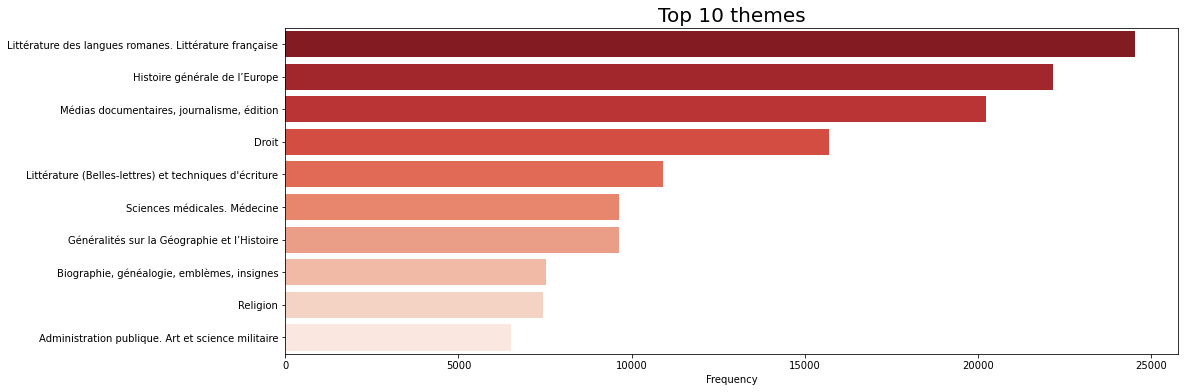

In [12]:
# get top 10 themes
theme_agg = collections.OrderedDict(interesting_aggregates["Theme_counter"][0].most_common(11))
temp = pd.DataFrame(data={ 'Frequency' : list(theme_agg.values())[1:]}, index = list(theme_agg.keys())[1:])
plt.figure(figsize=(16, 6))
g = sns.barplot(y=temp.index, x="Frequency", data=temp , palette="Reds_r")
g.set_title("Top 10 themes",fontsize=20)


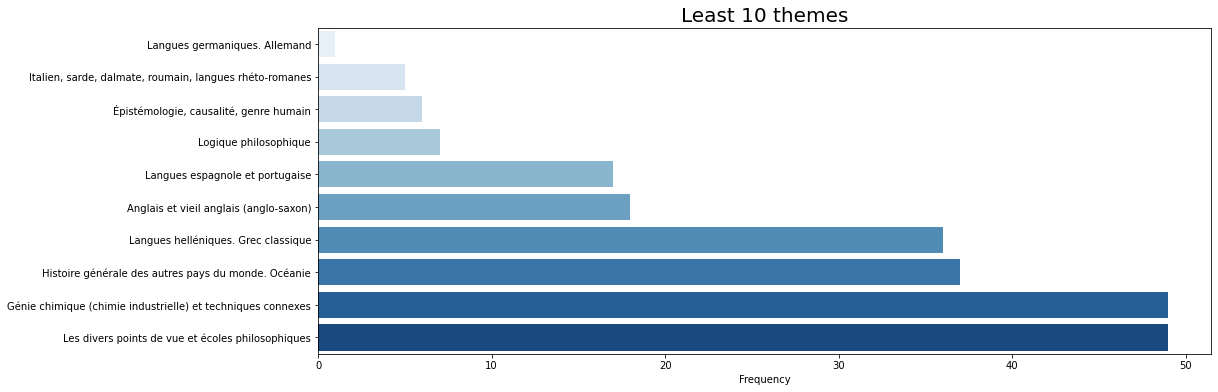

In [13]:
# get worst 10 themes
theme_agg = collections.OrderedDict(interesting_aggregates["Theme_counter"][0].most_common())
temp = pd.DataFrame(data={ 'Frequency' : list(theme_agg.values())[-10:][::-1]}, index = list(theme_agg.keys())[-10:][::-1])
plt.figure(figsize=(16, 6))
g = sns.barplot(y=temp.index, x="Frequency", data=temp , palette="Blues")
g.set_title("Least 10 themes",fontsize=20);


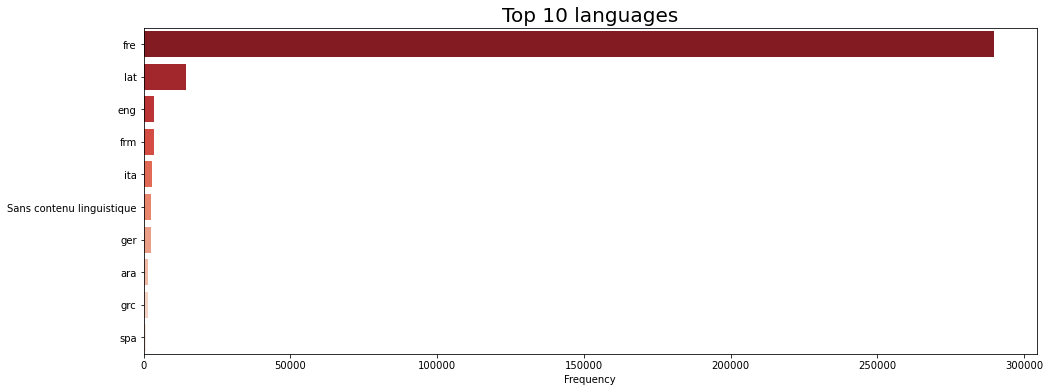

In [14]:
# get top 10 languages
theme_agg = collections.OrderedDict(interesting_aggregates["Language_counter"][0].most_common(11))
values = list(theme_agg.values())
keys = list(theme_agg.keys())
keys.pop(1)
values.pop(1)

temp = pd.DataFrame(data={ 'Frequency' : values}, index = keys)
plt.figure(figsize=(16, 6))
g = sns.barplot(y=temp.index, x="Frequency", data=temp , palette="Reds_r")
g.set_title("Top 10 languages",fontsize=20);

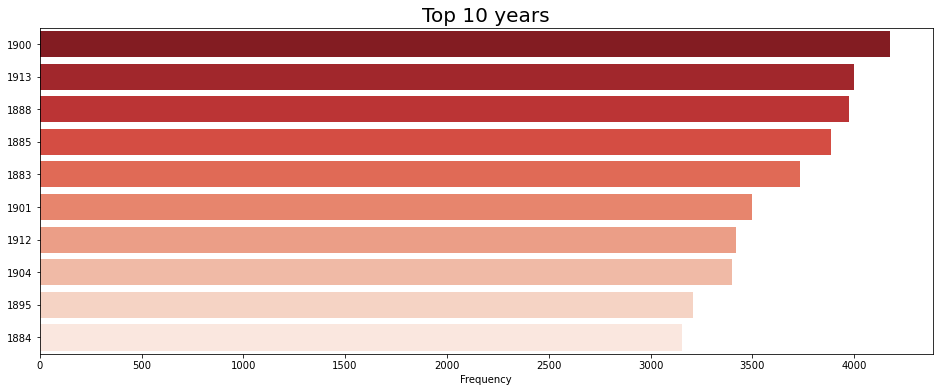

In [15]:
# get top 10 years
theme_agg = collections.OrderedDict(interesting_aggregates["Year_counter"][0].most_common(11))
temp = pd.DataFrame(data={ 'Frequency' : list(theme_agg.values())[1:]}, index = list(theme_agg.keys())[1:])
plt.figure(figsize=(16, 6))
g = sns.barplot(y=temp.index, x="Frequency", data=temp , palette="Reds_r")
g.set_title("Top 10 years",fontsize=20);

In [16]:
## bins => regarder par décennie
## voir les documents les plus consultés de cette année

## Matrix chain representation


In [17]:
## deveaud p21

## Markov chains

## Hitting time

## epsilon greedy simulation

## ergodicity ?

#### a) Themes

In [18]:
transitions = df.apply(lambda x:  list(filter(lambda theme: theme != '',x['Theme'])) ,axis = 1)

In [19]:
# dictionary of gallica themes, useful to interpret results from Gallica API queries
dewey_classification = {}
f = open("dewey.txt", "r",encoding='utf-8')
for x in f:
    try:
        if(x[2:4]=='0 '):
            dewey_classification[x[0:2]]= x[4:].rstrip()
    except:
        continue
        
index_to_themes=dewey_classification

In [20]:
deweys =list(itertools.combinations_with_replacement(dewey_classification.values(), 2))
fq = collections.defaultdict(int)

In [21]:
# create empty dataframe with all 0s
df_themes_transition = pd.DataFrame(0, columns = dewey_classification.values(),index = dewey_classification.values())

In [22]:
# increment according to frequency
for n in range(len(transitions)):
    for (i,j) in zip(transitions.iloc[n],transitions.iloc[n][1:]):
            df_themes_transition[i][j]=df_themes_transition[i][j]+1

In [23]:
# divide by the sum to obtain a probability
df_themes_transition = df_themes_transition.div(df_themes_transition.sum(axis=1), axis=0)


In [24]:
df_themes_transition_zoom = df_themes_transition[df_themes_transition.columns[-40:-30]].loc[df_themes_transition.columns[-40:-30]]
df_themes_transition_zoom

,Technologie (Sciences appliquées),Sciences médicales. Médecine,Art de l’ingénieur et activités connexes,"Agronomie, agriculture et activités connexes",Économie domestique (arts ménagers). Vie familiale,Gestion de l'entreprise et services auxiliaires,Génie chimique (chimie industrielle) et techniques connexes,Fabrication industrielle,Fabrications de produits à usages particuliers,Bâtiments
Technologie (Sciences appliquées),0.185603,0.043049,0.038814,0.032463,0.009174,0.001411,0.000000,0.002823,0.001411,0.004234
Sciences médicales. Médecine,0.006980,0.281188,0.005983,0.019167,0.000665,0.000222,0.000776,0.000665,0.000332,0.000222
Art de l’ingénieur et activités connexes,0.026110,0.020888,0.344125,0.016710,0.001044,0.000522,0.000000,0.004178,0.000522,0.003133
"Agronomie, agriculture et activités connexes",0.016310,0.054730,0.013048,0.106198,0.001087,0.000000,0.000000,0.001450,0.001450,0.000725
Économie domestique (arts ménagers). Vie familiale,0.033951,0.037037,0.000000,0.006173,0.413580,0.000000,0.000000,0.015432,0.000000,0.003086
Gestion de l'entreprise et services auxiliaires,0.006211,0.000000,0.012422,0.018634,0.000000,0.416149,0.000000,0.000000,0.000000,0.000000
Génie chimique (chimie industrielle) et techniques connexes,0.000000,0.062500,0.000000,0.000000,0.000000,0.000000,0.708333,0.000000,0.000000,0.000000
Fabrication industrielle,0.011494,0.053640,0.026820,0.015326,0.015326,0.000000,0.000000,0.095785,0.000000,0.007663
Fabrications de produits à usages particuliers,0.023256,0.046512,0.011628,0.023256,0.034884,0.000000,0.000000,0.011628,0.069767,0.000000
Bâtiments,0.074074,0.046296,0.037037,0.009259,0.009259,0.000000,0.000000,0.009259,0.000000,0.129630


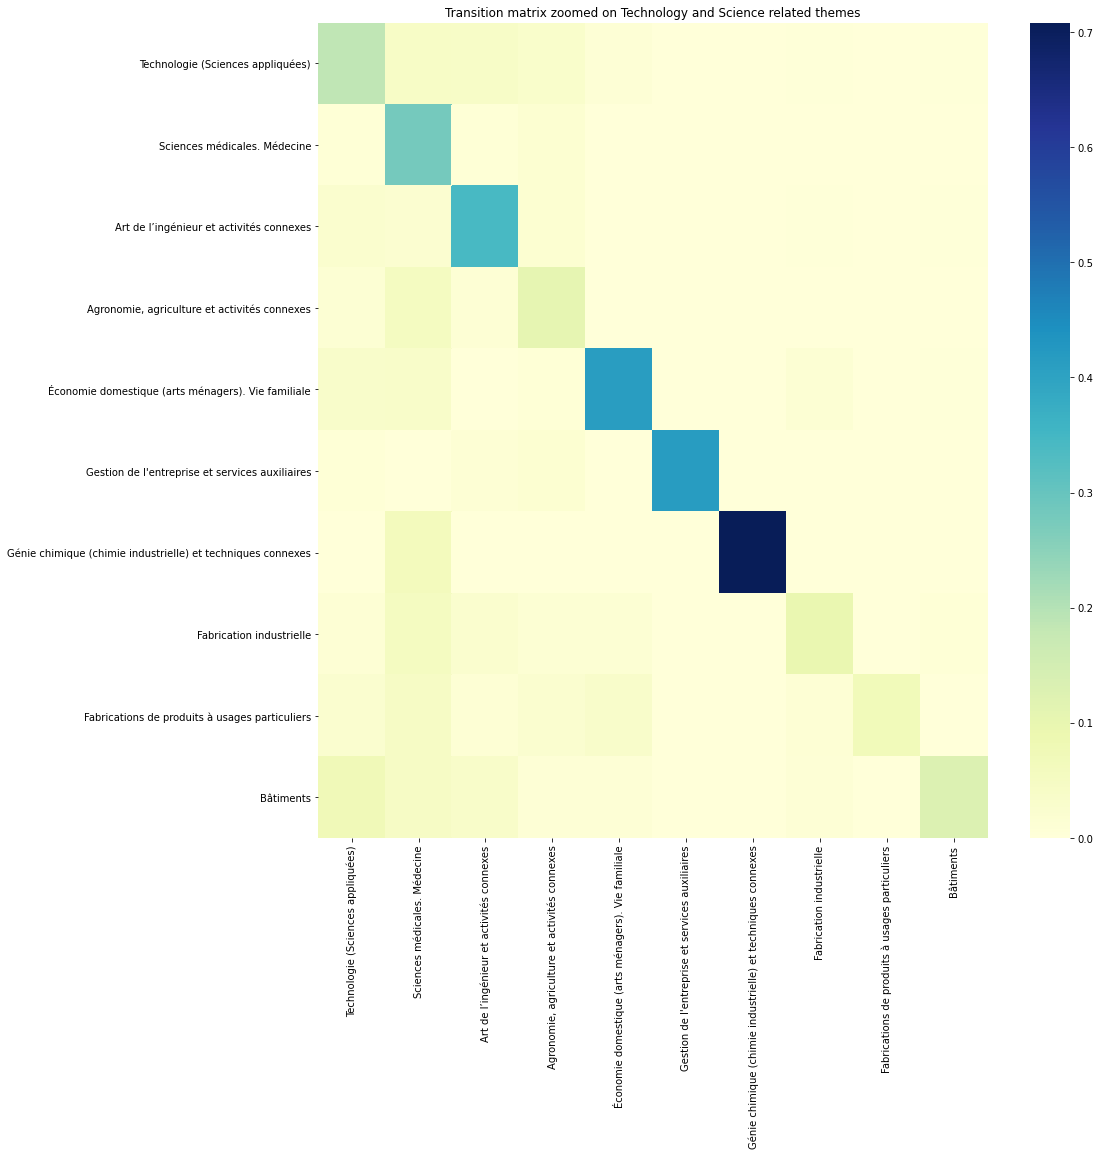

In [25]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_themes_transition_zoom, annot=False, cmap="YlGnBu",xticklabels=True, yticklabels=True)
plt.title('Transition matrix zoomed on Technology and Science related themes');
plt.savefig('themes_technology.png')


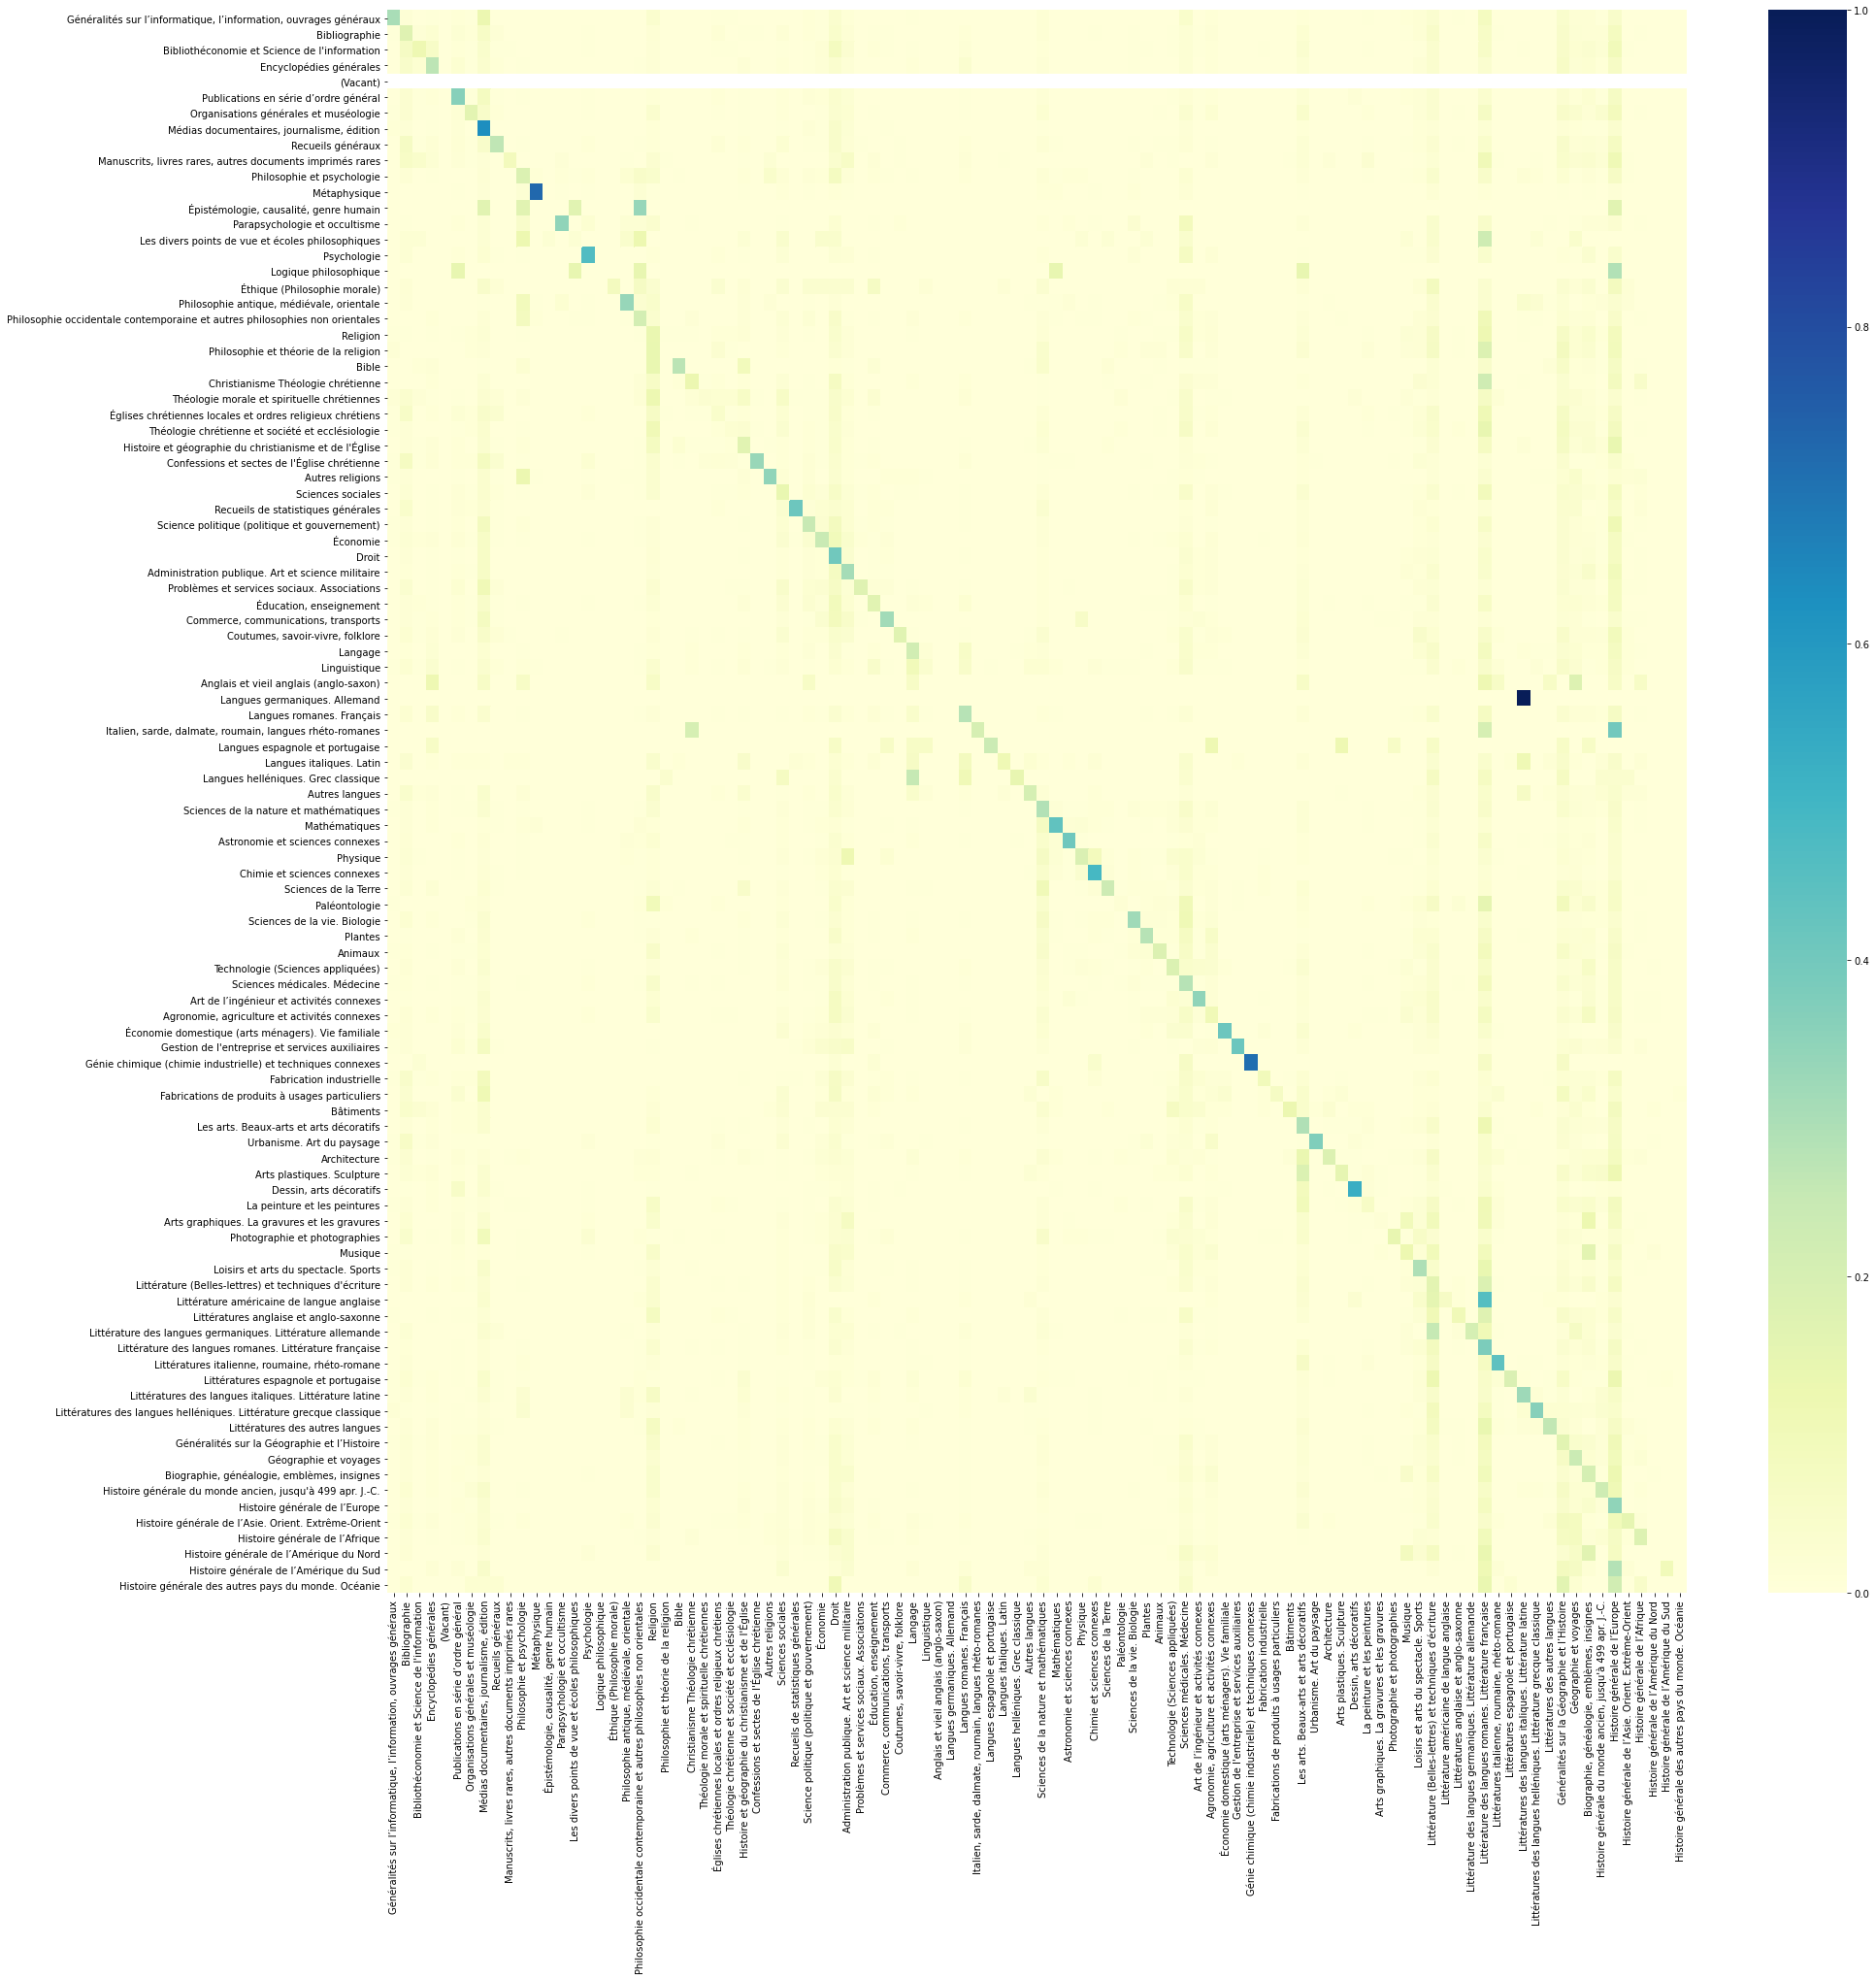

In [26]:
plt.figure(figsize=(30, 30))
sns.heatmap(df_themes_transition, annot=False, cmap="YlGnBu",xticklabels=True, yticklabels=True)


In [27]:
## regarder là ou elle est pas symétrique
# un thème mène à un autre mais pas réciproquement

## thèmes qui sont plus propices que les autres à ramener à d'autre thème => distribution la plus uniforme (enlever staying in the same state pour avoir plus de relief sur les autres transitions) => comparer avec le social media graph => get super spreaders, comparer aux statistiques

#  association d'idées peut se faire avec un lien avec un document n-2 , n-3 => s, paralléliser

#  regarder longues sessions => matrices de transition, identifier bot crawler? séquence => matrice transition

## save first and last connection in timestamp => nombre de consultations/temps passé => >10000 , look at distribution. zoom on the tail end

## bins décennie

## color dewey themes by big themes

## Fadi el hage => retrouver des parcours napoléonienne

## => 4 juin

#### b) Languages

In [28]:
transitions = df.apply(lambda x:  list(filter(lambda theme: theme != '',x['Language'])) ,axis = 1)


In [29]:
# get all possible languages
theme_agg = collections.OrderedDict(interesting_aggregates["Language_counter"][0])
key = list(theme_agg.keys())
key.pop(1)

''

In [30]:
# create empty dataframe with all 0s
dftemp = pd.DataFrame(0, columns = key,index = key)

In [31]:
# increment according to frequency
for n in range(len(transitions)):
    for (i,j) in zip(transitions.iloc[n],transitions.iloc[n][1:]):
            dftemp[i][j]=dftemp[i][j]+1

In [32]:
# divide by the sum to obtain a probability
dftemp = dftemp.div(dftemp.sum(axis=1), axis=0)

In [33]:
dftemp_zoom = dftemp[['fre','ita','lat','dut','spa','Sans contenu linguistique']].loc[['fre','ita','lat','dut','spa','Sans contenu linguistique']]

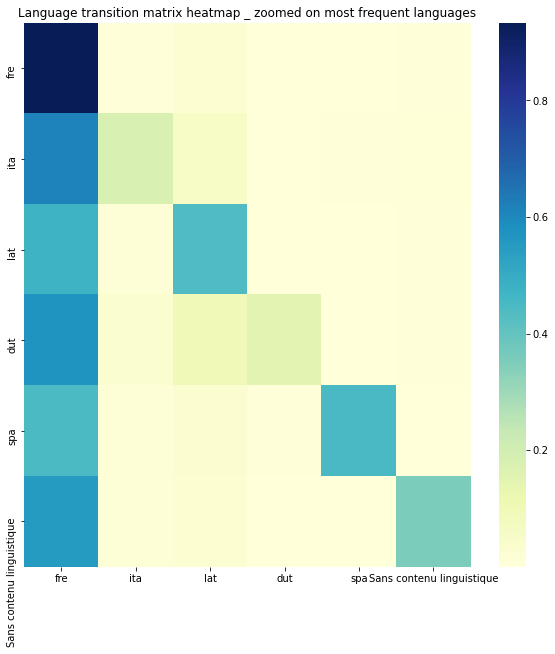

In [34]:
plt.figure(figsize=(10, 10))
plt.title("Language transition matrix heatmap _ zoomed on most frequent languages")
sns.heatmap(dftemp_zoom, annot=False, cmap="YlGnBu",xticklabels=True, yticklabels=True);
plt.savefig('languages_mostfrequent_tmatrix.png')

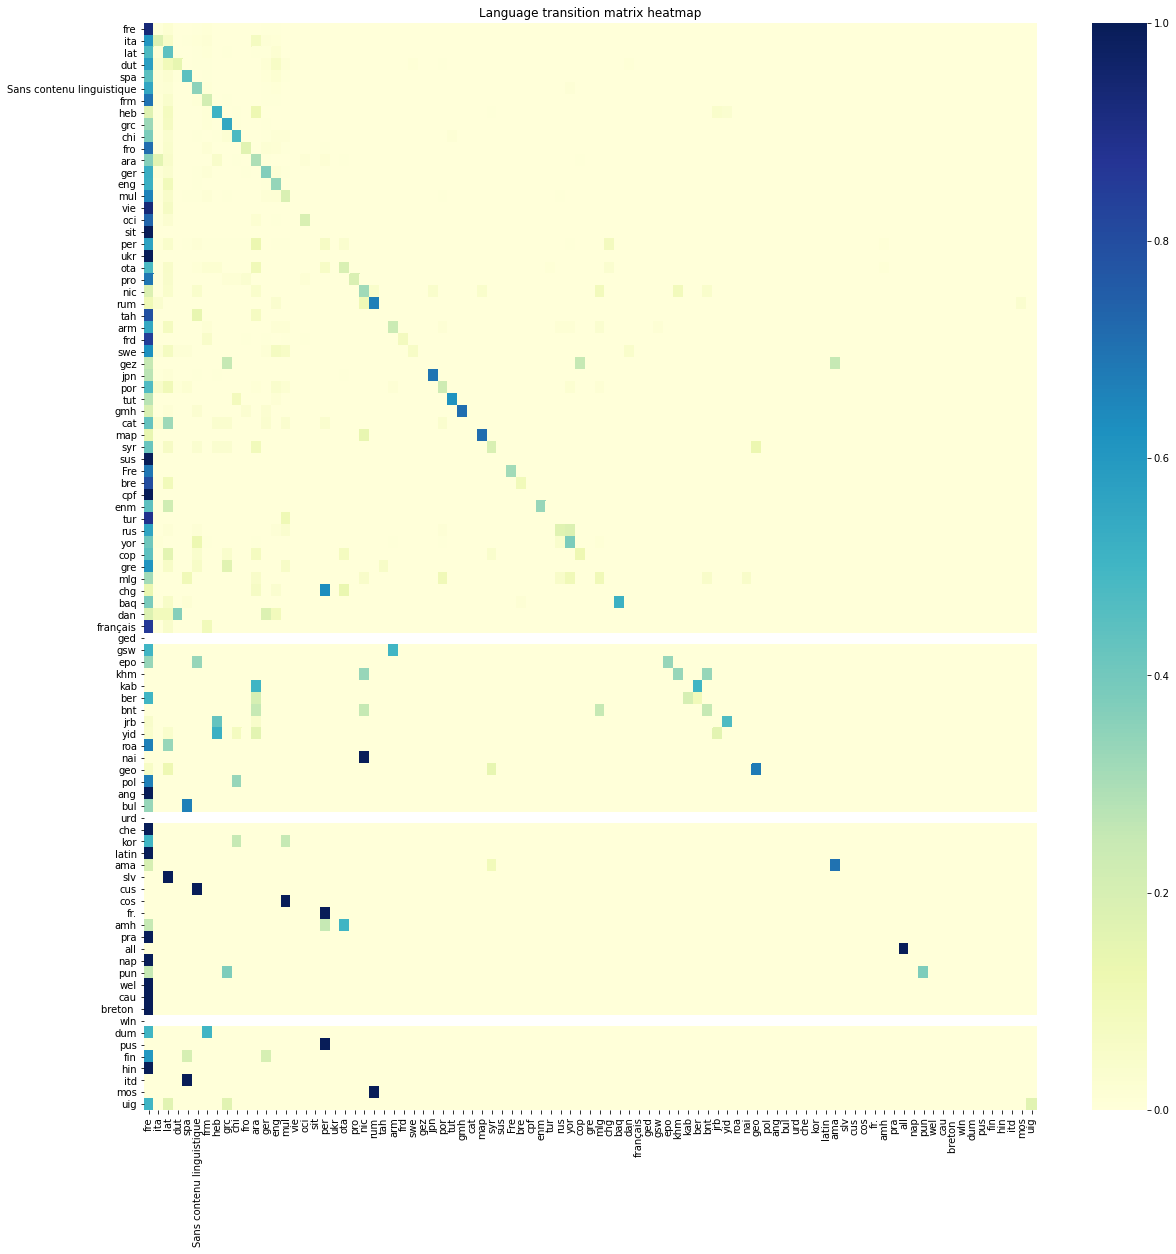

In [35]:
plt.figure(figsize=(20, 20))
plt.title("Language transition matrix heatmap")
sns.heatmap(dftemp, annot=False, cmap="YlGnBu",xticklabels=True, yticklabels=True);

## Word2vec + T-SNE representation

In [36]:
## https://plotly.com/python/network-graphs/
## 

In [37]:
clean_themes = df.apply(lambda x:  list(filter(lambda theme: theme != '',x['Theme'])) ,axis = 1)

In [38]:
# Create the list of list format of the custom corpus for gensim modeling 
corpus = [row for row in clean_themes]

In [39]:
# view corpus
corpus[0]

['Droit',
 'Christianisme Théologie chrétienne',
 'Religion',
 'Loisirs et arts du spectacle. Sports',
 'Littérature des langues romanes. Littérature française',
 'Les arts. Beaux-arts et arts décoratifs',
 "Littérature (Belles-lettres) et techniques d'écriture",
 'Littérature des langues romanes. Littérature française',
 'Organisations générales et muséologie',
 'Bibliographie',
 'Littérature des langues romanes. Littérature française',
 "Littérature (Belles-lettres) et techniques d'écriture",
 "Littérature (Belles-lettres) et techniques d'écriture",
 'Littératures des langues helléniques. Littérature grecque classique',
 'Bibliographie',
 "Littérature (Belles-lettres) et techniques d'écriture",
 "Littérature (Belles-lettres) et techniques d'écriture",
 'Littérature des langues romanes. Littérature française',
 "Histoire générale du monde ancien, jusqu'à 499 apr. J.-C.",
 'Publications en série d’ordre général',
 'Médias documentaires, journalisme, édition',
 "Littérature (Belles-lett

In [40]:
len(corpus)

20200

In [41]:
import gensim
from gensim.test.utils import common_texts
from gensim.models import Word2Vec

In [42]:
model = Word2Vec(corpus, min_count=5,size= 400,workers=10, window =5, sg = 1)

In [43]:
# trying the model with one word
model.wv.most_similar('Bible')

[("Histoire et géographie du christianisme et de l'Église",
  0.7690906524658203),
 ('Littératures des autres langues', 0.6407153010368347),
 ('Religion', 0.5777055025100708),
 ('Sciences de la Terre', 0.5740489363670349),
 ('Théologie morale et spirituelle chrétiennes', 0.561286211013794),
 ('Épistémologie, causalité, genre humain', 0.5445041656494141),
 ('Christianisme Théologie chrétienne', 0.4937625527381897),
 ('Italien, sarde, dalmate, roumain, langues rhéto-romanes',
  0.4824824929237366),
 ('Parapsychologie et occultisme', 0.4755699634552002),
 ('Théologie chrétienne et société et ecclésiologie', 0.4644048511981964)]

In [44]:
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_20newsgroups
import re
import matplotlib.pyplot as plt
import matplotlib as mpl

vocab = list(model.wv.vocab)
X = model.wv[vocab]

tsne = TSNE(n_components=2,perplexity = 50)
X_tsne = tsne.fit_transform(X)
df1 = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y'])


In [45]:
import plotly.express as px

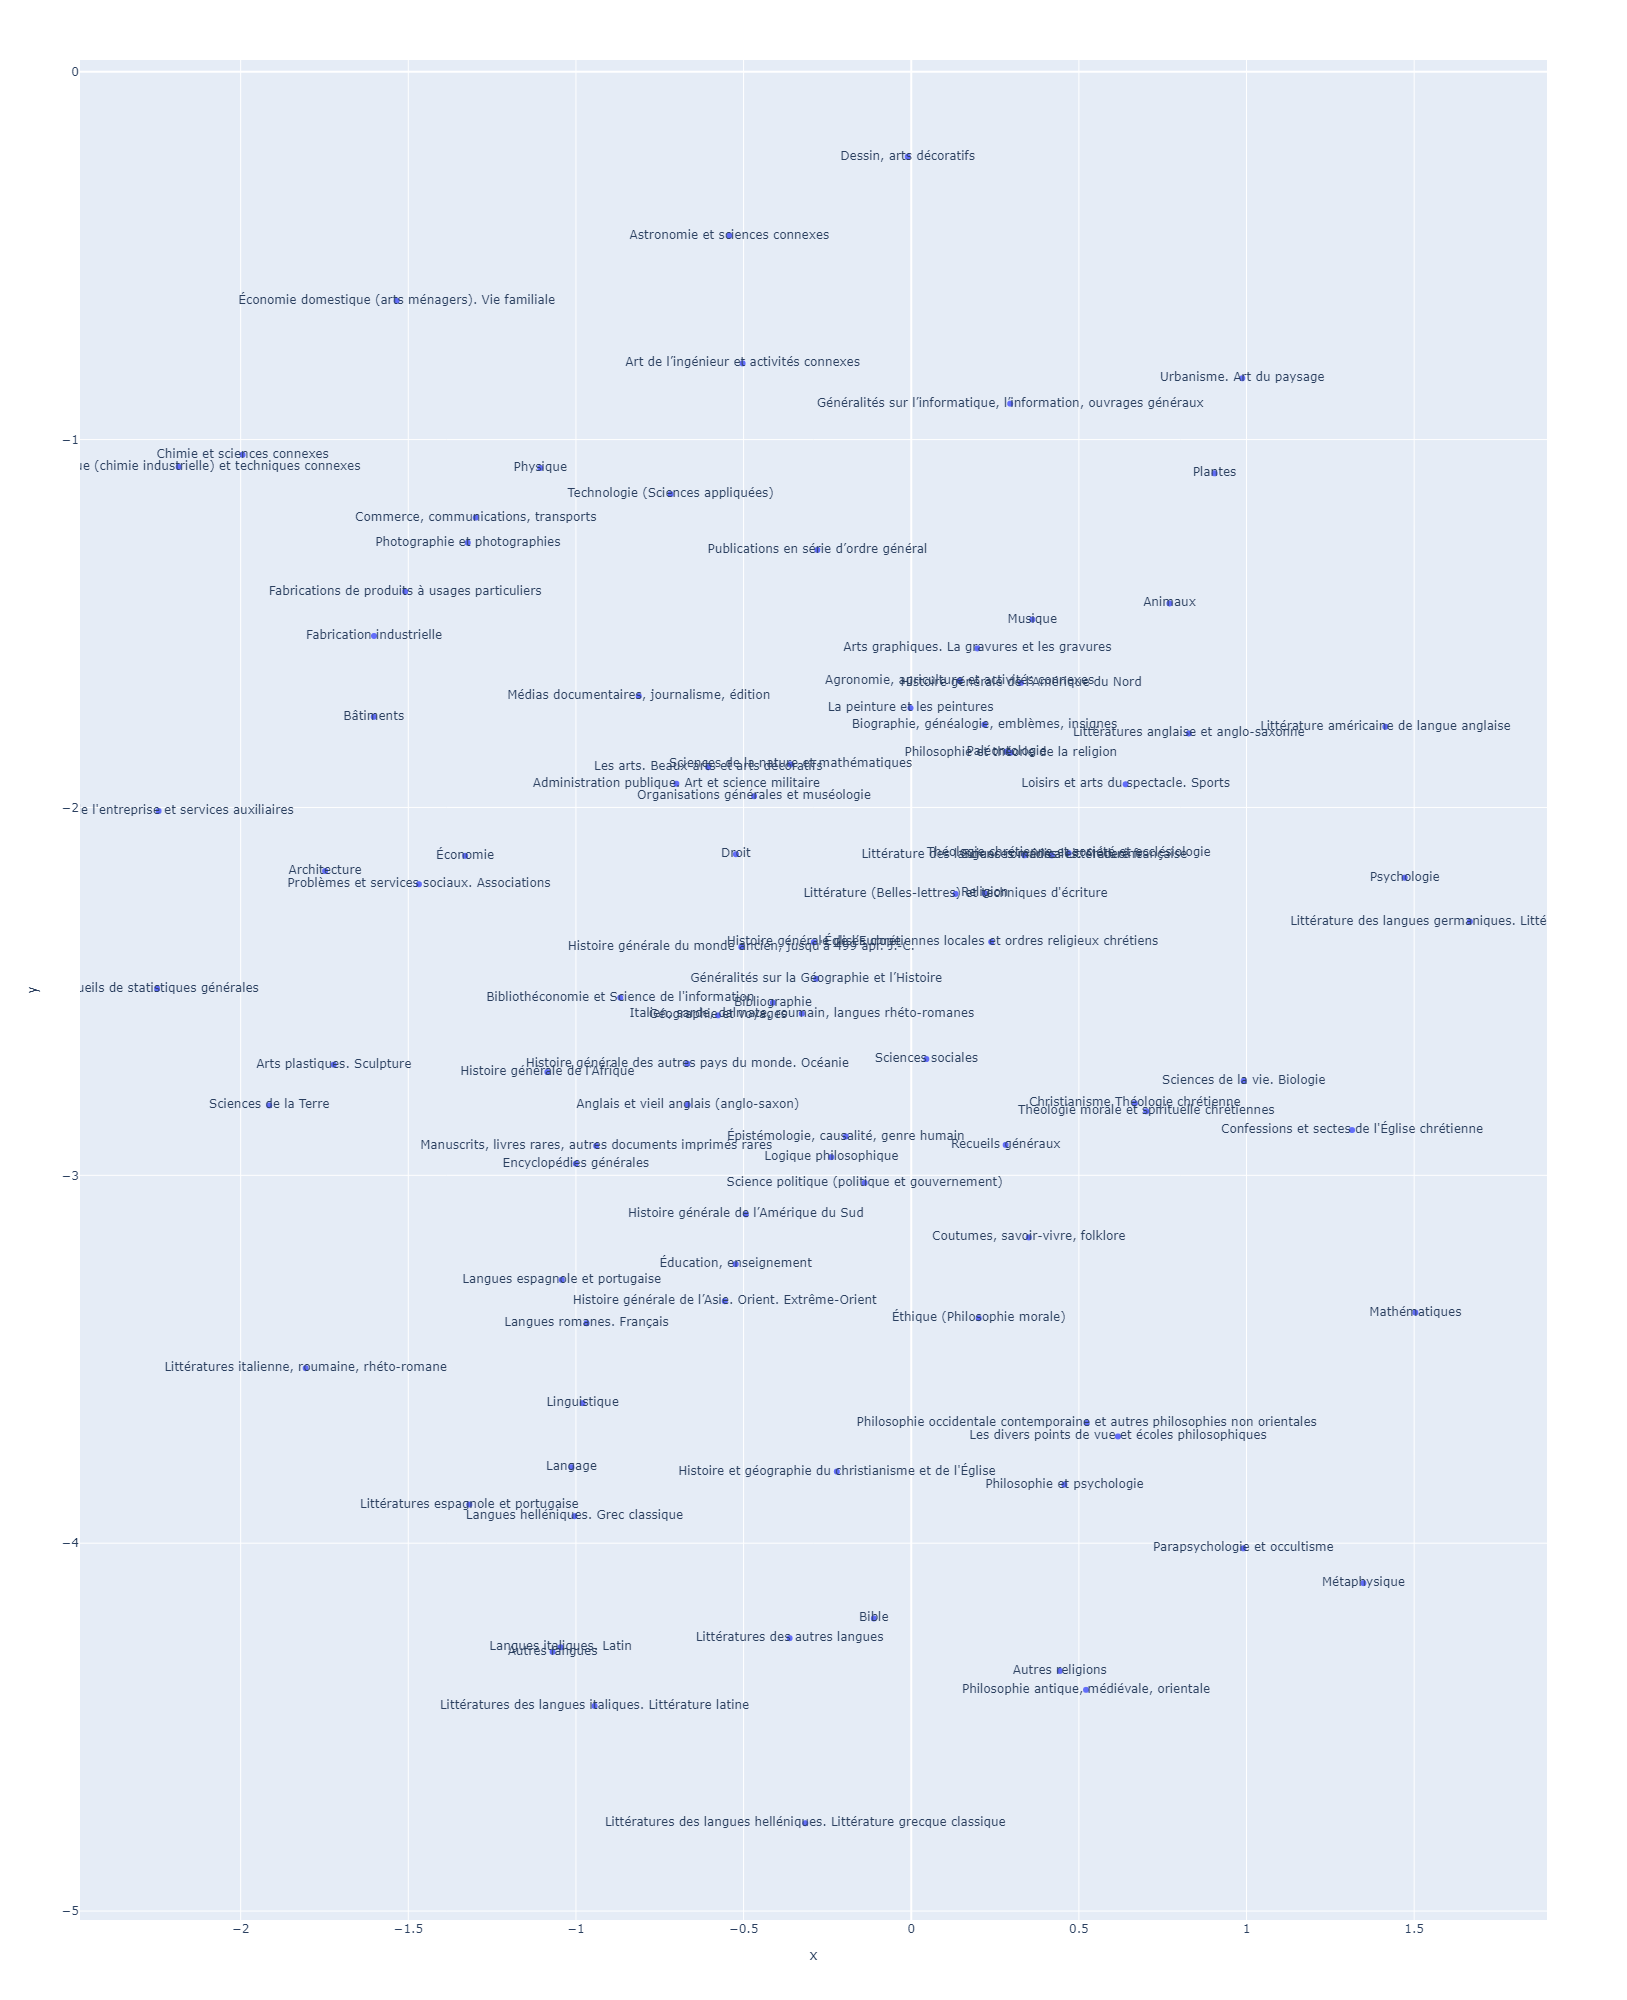

In [60]:
fig = px.scatter(x=df1['x'],y=df1['y'],text=df1.index, width=2000, height=2000)
fig.show()

## Interview questions and answers

In [47]:
# Question 1: Combien de temps dure une "utilisation" du site de Gallica?
# Question 2: Différence entre bibliothèque numérique et physique, comportements différents?
# Question 3: Est-ce que ça vous arrive de lire plusieurs document en même temps?
# Question 4: est-ce que ça vous arrive d'explorer des documents dans des langues différentes?

In [49]:
def search_title(row):
    condition = False
    for c in row['Title']:
        if('maréchaux' in c):
            condition = True

In [54]:
marechaux_df = df[df.apply(lambda x: ('maréchaux' in ('\t'.join(x['Title'])).lower()) or 
            ('maréchal' in ('\t'.join(x['Title'])).lower()) or 
             ('maréchal' in ('\t'.join(x['Title'])).lower()), axis = 1   )  ][['Title','Theme']]

In [ ]:
napoleon_df = df[df.apply(lambda x: ('napoléon' in ('\t'.join(x['Title'])).lower()), axis = 1   )  ]['Title']

In [82]:
# Path shown in interview 
marechaux_df.iloc[20]['Title']

["Edouard et Sophie. Partie 1 / . Roman traduit de l'anglois. Premiere [-seconde] partie",
 'Corrections raisonnées des fautes de langage et de prononciation qui se commettent... dans la Provence et quelques autres provinces du Midi ([Reprod.]) / par J. B. Reynier',
 'Le Solitaire / rédacteur en chef : Grég. Jeanne',
 "Encyclopédie méthodique. Marine. T. 1, [Abab-Dessus de vaisseau]  / , dédiée et présentée a monseigneur le maréchal de Castries, ministre et secrétaire d'État au département de la marine, &c. Tome premier [-troisième]",
 "Dictionnaire pratique d'horticulture et de jardinage. Tome 2 / par G. Nicholson,... ; traduit, mis à jour et adapté à notre climat, à nos usages, etc., etc., par S. Mottet,... ; avec la collaboration de MM. Vilmorin-Andrieux et Cie, G. Alluard, E. André, G. Bellar, G. Legros...",
 'Encyclopédie méthodique. Arts et métiers mécaniques. Tome 8 / , [par Jacques Lacombe]',
 'Théâtre de Plaute. Tome 9 / traduction nouvelle accompagnée de notes, par J. Naudet,

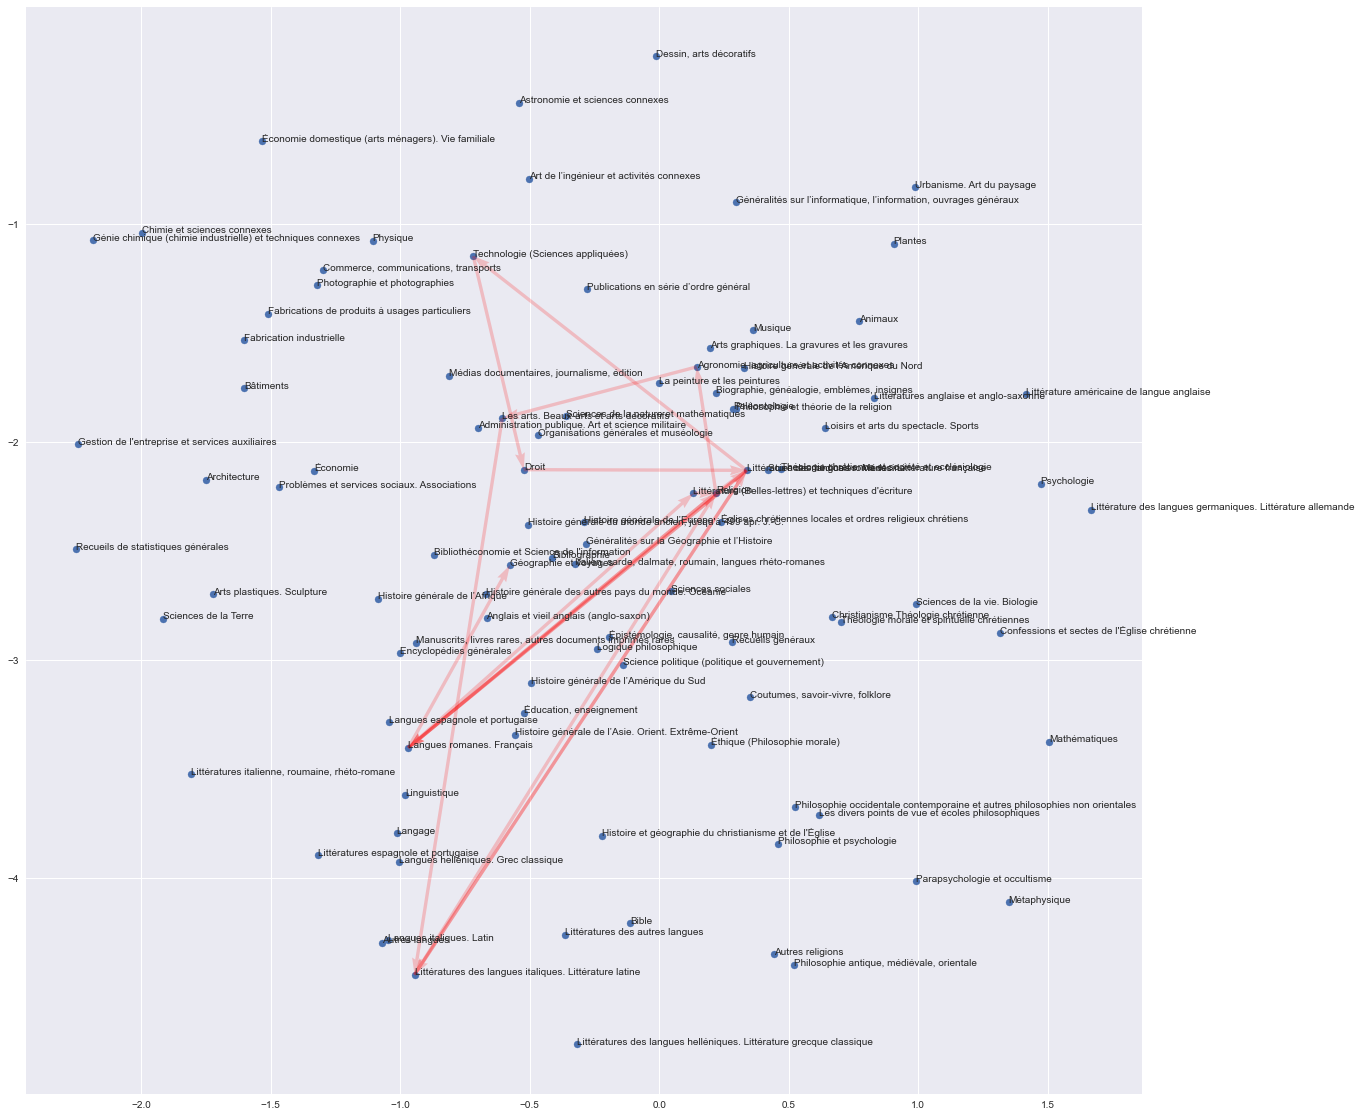

In [84]:
#Visualizing the path shown during the interview.

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(1, 1, 1)
mpl.style.use('seaborn')

ax.scatter(df1['x'], df1['y'])
for word, pos in df1.iterrows():
    ax.annotate(word, pos)

    
# create path 1 
path_1 = list(marechaux_df['Theme'].iloc[20])
path_1_vectors = []
for p in path_1:
    if p in df1.index:
        path_1_vectors.append(list(df1.loc[p][['x','y']]))

path_1_vectors = np.array(path_1_vectors)
    
x = path_1_vectors[:, 0]
y = path_1_vectors[:, 1]


a1 = plt.quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1,width = 0.003,color = 'red',alpha=.2 )




plt.show()

# Questions answered during the project

#### a) Themes that are more likely to lead to other themes

In [ ]:
## thèmes qui sont plus propices que les autres à ramener à d'autre thème => distribution la plus uniforme (enlever staying in the same state pour avoir plus de relief sur les autres transitions) 
## => comparer avec le social media graph => get super spreaders, comparer aux statistiques


##### a) 1) Robust transition matrix 
The colormap range is computed with robust quantiles instead of the extreme values.

In [ ]:
plt.figure(figsize=(30, 30))
sns.heatmap(df_themes_transition,robust=True, annot=False,xticklabels=True,fmt="f", cmap="YlGnBu", yticklabels=True)
plt.title('Transition matrix by dewey themes');

#### a) 2) first look at distribution 


In [ ]:
print("Most transitioned-to theme : ", df_themes_transition.mean(axis=1).idxmax(), " with ", df_themes_transition.mean(axis = 1 ).max() , "of probability of transition to on average")
# theme qui envoie le plus vers d'autres themes 
# différence significative

In [ ]:
df_themes_transition.sum(axis=1)

In [ ]:
print("Top 5 themes to reach from ", df_themes_transition.mean(axis=1).idxmax())
df_themes_transition.loc[df_themes_transition.mean(axis=1).idxmax()].sort_values(ascending = False)[:5]

In [ ]:
# looking at the first distribution besides 0 
df_themes_transition.iloc[0][(df_themes_transition.iloc[0]>0)].hist(bins = 100);
plt.title('Distribution of transitions for généralités sur linformatique')
plt.xlabel('Probability of transition')
plt.ylabel('nr of out ');

In [ ]:
print("Most transitioned from theme : ", df_themes_transition.median().idxmax(), " with ", df_themes_transition.median().max() )


In [ ]:
print("Top 5 themes to reach from ", df_themes_transition.median().idxmax())
df_themes_transition.loc[df_themes_transition.median().idxmax()].sort_values(ascending = False)[:5]

#### a) 3) Social media like representation

In [ ]:
import networkx as nx  # For the magic


In [ ]:
states = list(dewey_classification.values())
Q = df_themes_transition

In [ ]:
Q[states[0]][states[0]]

In [ ]:
G = nx.DiGraph()
labels={}
edge_labels={}

for i, origin_state in enumerate(states):
    for j, destination_state in enumerate(states):
        rate = Q[origin_state][destination_state]
        if rate > 0:
            G.add_edge(origin_state,
                       destination_state,
                       weight=rate,
                       label="{:.02f}".format(rate))
            edge_labels[(origin_state, destination_state)] = label="{:.02f}".format(rate)

In [ ]:
df_themes_transition['Génie chimique (chimie industrielle) et techniques connexes'].sort_values(ascending= False)

In [ ]:
# Position nodes using Fruchterman-Reingold force-directed algorithm.

# The algorithm simulates a force-directed representation of the network treating edges as springs holding nodes close, while treating nodes as repelling objects,
# sometimes called an anti-gravity force. Simulation continues until the positions are close to an equilibrium.

plt.figure(figsize=(70,70))
node_size = 500
pos = nx.spring_layout(G)
nx.draw_networkx_edges(G,pos,width=1.0,alpha=0.1)
nx.draw_networkx_labels(G, pos, font_weight=1.5)
plt.savefig('themes_network.png')
plt.axis('off');

In [ ]:
btw=nx.betweenness_centrality(G)

In [ ]:
print('Top 5 betweenness centrality')
sorted(btw.items(), key=lambda x: x[1], reverse = True )[:5]


In [ ]:
print('Least 5 betweenness centrality')
sorted(btw.items(), key=lambda x: x[1])[:5]


In [ ]:
#  association d'idées peut se faire avec un lien avec un document n-2 , n-3 => s, paralléliser

#  regarder longues sessions => matrices de transition, identifier bot crawler? séquence => matrice transition

## save first and last connection in timestamp => nombre de consultations/temps passé => >10000 , look at distribution. zoom on the tail end

## bins décennie

## color dewey themes by big themes

## Fadi el hage => retrouver des parcours napoléonienne

## => 4 juin

#### b) identify outliers, bot crawlers?

In [ ]:
from datetime import datetime


In [ ]:
def minutes_between(d1, d2):
    d1 = datetime.strptime(d1, "%d/%b/%Y:%H:%M:%S")
    d2 = datetime.strptime(d2, "%d/%b/%Y:%H:%M:%S")
    return abs(((d2 - d1)).total_seconds() // 60.0)

In [ ]:
df_2.iloc[0]['Date'][2:]

In [ ]:
sessions = pd.read_csv('SessionsApril2016from300to1000_clean.csv',engine='python',error_bad_lines=False)  
sessions.Ark = sessions.Ark.apply(literal_eval)
sessions.Date = sessions.Date.apply(literal_eval)

In [ ]:
sessions['session_length'] = temp.apply(lambda x : minutes_between(x[0][:-6],x[1][:-6]))

In [ ]:
sessions["len"]= sessions.apply(lambda x: len(x['Ark']),axis=1)


In [ ]:
sessions.sort_values(by = ['session_length'] , ascending = False)

In [ ]:
sessions['session_length'][(sessions['session_length']>3) & (sessions['session_length']<1000) ].hist(bins = 50);
plt.title('distribution of session lengths');

In [ ]:
# Zoom on the tail end 
sessions['session_length'][(sessions['session_length']>1000)].hist(bins = 50);
plt.title('distribution of session lengths - zoom on the tail end ');

In [ ]:
# statistics behind session length
sessions.session_length.describe()

In [ ]:
largest = pd.read_csv('largest_path.csv', index_col=0)

In [ ]:
largest
# transition matrix

##### 3) Clustering

In [ ]:
df_clustering = df.copy()

In [ ]:
a = collections.OrderedDict(interesting_aggregates["Language_counter"][0].most_common(11))
a.pop('')

In [ ]:
df_clustering = pd.concat([df_clustering,pd.DataFrame(columns=a.keys())], axis =1)

In [ ]:
a = collections.OrderedDict(interesting_aggregates["Theme_counter"][0])
a.pop('')

In [ ]:
df_clustering = pd.concat([df_clustering,pd.DataFrame(columns=a.keys())], axis =1)

In [ ]:
df_clustering

In [ ]:
df_clustering.head()

#### b) visualising clusters


In [ ]:
cluster_1 = df_clustering.iloc[:20]

In [ ]:
cluster_1

In [ ]:
G = nx.DiGraph()
labels={}
edge_labels={}

for i, origin_state in enumerate(states):
    for j, destination_state in enumerate(states):
        rate = Q[origin_state][destination_state]
        if rate > 0:
            G.add_edge(origin_state,
                       destination_state,
                       weight=rate,
                       label="{:.02f}".format(rate))
            edge_labels[(origin_state, destination_state)] = label="{:.02f}".format(rate)